# Importing libraries

In [2]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sdv
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot
from sdv.metadata import Metadata

# Importing data

In [5]:
#Real data: WP6
real_data = pd.read_csv("/content/drive/MyDrive/Files For Project/AtomPairsData.csv")
real_data = real_data.drop(["Unnamed: 0"], axis = 1)

#Real data: WP6++
real_data_add = pd.read_csv("/content/drive/MyDrive/Files For Project/AtomPairsData++.csv")
real_data_add = real_data_add.drop(["Unnamed: 0"], axis = 1)

#Synthetic data: WP6
synthetic_data = pd.read_csv("/content/drive/MyDrive/Files For Project/GeneratedData.csv")
synthetic_data = synthetic_data.drop(["Unnamed: 0"], axis = 1)

#First synthetic dataset: WP6++
synthetic_data2_add = pd.read_csv("/content/drive/MyDrive/Files For Project/GeneratedData2++.csv")
synthetic_data2_add = synthetic_data2_add.drop(["Unnamed: 0"], axis = 1)

#Second synthetic data: WP6++
synthetic_data4_add = pd.read_csv("/content/drive/MyDrive/Files For Project/GeneratedData4++.csv")
synthetic_data4_add = synthetic_data4_add.drop(["Unnamed: 0"], axis = 1)

# Evaluating synthetic **WP6 dataset**

In [31]:
real_data.head(5)

,304,209,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,1,0,0.000000,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,0.500000,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,1,0,0.500000,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185
3,1,0,0.000000,0.203617,0.608696,0.625769,0.000000,0.0,0.580032,1.000000,0.000000,0.178277,0.004812
4,1,0,0.457509,0.143555,0.060870,0.859423,0.071555,1.0,0.384046,0.025424,1.000000,0.049802,0.000000


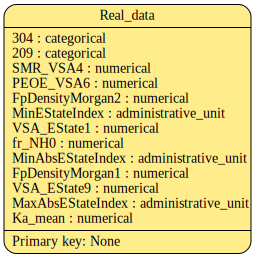

In [40]:
#Creating metadata
metadata = Metadata.detect_from_dataframes(
    data={
        'Real_data': real_data
    })
metadata.visualize()

In [42]:
#Fixing the sdtype of some columns
metadata.update_column(
    table_name='Real_data',
    column_name='MinEStateIndex',
    sdtype='numerical',
)
metadata.update_column(
    table_name='Real_data',
    column_name= "MinAbsEStateIndex",
    sdtype='numerical',
)
metadata.update_column(
    table_name='Real_data',
    column_name="MaxAbsEStateIndex",
    sdtype='numerical',
)
metadata.update_column(
    table_name='Real_data',
    column_name="fr_NH0",
    sdtype='categorical',
)

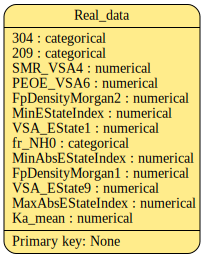

In [43]:
metadata.visualize()

In [26]:
# Perform basic validity checks
diagnostic = run_diagnostic(real_data, synthetic_data, metadata)

# Measure the statistical similarity
quality_report = evaluate_quality(real_data, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 353.43it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 103.84it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 276.04it/s]|
Column Shapes Score: 70.57%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:02<00:00, 38.54it/s]|
Column Pair Trends Score: 75.79%

Overall Score (Average): 73.18%



In [27]:
# Plot the data
for column_name in real_data.columns:
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        metadata=metadata,
        column_name=column_name
    )

    fig.show()

# WP6++ datasets

In [30]:
real_data_add.head(5)

,209,193,SMR_VSA4,PEOE_VSA9,VSA_EState9,SlogP_VSA2,FpDensityMorgan2,FpDensityMorgan3,PEOE_VSA6,MinEStateIndex,VSA_EState5,Chi0v,Ka_mean
0,0,0,0.000000,0.111125,0.383244,0.095394,0.096990,0.243292,0.332359,0.904940,0.062805,0.189597,0.000510
1,0,0,0.500000,1.000000,0.784061,1.000000,0.070652,0.123547,0.000000,0.955733,0.542489,0.307724,0.441176
2,0,0,0.500000,0.111125,0.383244,0.095394,1.000000,0.968605,0.000000,0.918240,0.546644,0.020002,0.006274
3,0,0,0.000000,0.113446,0.352071,0.224863,0.608696,0.434884,0.145239,0.650821,0.062805,0.048899,0.004902
4,0,0,0.457509,0.895845,1.000000,0.984119,0.060870,0.114651,0.102398,0.863082,0.062805,0.461054,0.000090


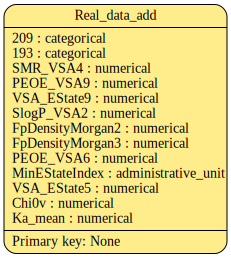

In [35]:
metadata2 = Metadata.detect_from_dataframes(
    data={
        'Real_data_add': real_data_add
    })
metadata2.visualize()

In [37]:
metadata2.update_column(
    table_name='Real_data_add',
    column_name="MinEStateIndex",
    sdtype='numerical',
)

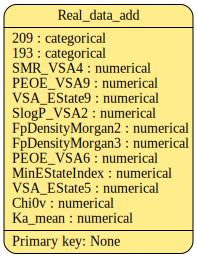

In [44]:
metadata2.visualize()

## Evaluating the first

In [45]:
# Perform basic validity checks
diagnostic = run_diagnostic(real_data_add, synthetic_data2_add, metadata2)

# Measure the statistical similarity
quality_report = evaluate_quality(real_data_add, synthetic_data2_add, metadata2)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 1071.95it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 196.68it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 577.61it/s]|
Column Shapes Score: 67.65%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 128.20it/s]|
Column Pair Trends Score: 77.93%

Overall Score (Average): 72.79%



In [46]:
# Plot the data
for column_name in real_data_add.columns:
    fig = get_column_plot(
        real_data=real_data_add,
        synthetic_data=synthetic_data2_add,
        metadata=metadata2,
        column_name=column_name
    )

    fig.show()

## Evaluating the second

In [47]:
# Perform basic validity checks
diagnostic = run_diagnostic(real_data_add, synthetic_data4_add, metadata2)

# Measure the statistical similarity
quality_report = evaluate_quality(real_data_add, synthetic_data4_add, metadata2)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 13/13 [00:00<00:00, 803.74it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 140.17it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 472.68it/s]|
Column Shapes Score: 64.77%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 84.10it/s]|
Column Pair Trends Score: 76.35%

Overall Score (Average): 70.56%



In [48]:
# Plot the data
for column_name in real_data_add.columns:
    fig = get_column_plot(
        real_data=real_data_add,
        synthetic_data=synthetic_data2_add,
        metadata=metadata2,
        column_name=column_name
    )

    fig.show()

# Summary

Thus, the synthesised WP6 dataset showed 73.18% similarity with the real one.

If we choose between WP6++, the first and the second one, the first one performed better: 72.79% similarity with the real data